# Chapter 3.5.4: An end-to-end example

A linear classifier in pure TensorFlow

Working through the simple linear classifier outlined in Chapter 3.5.4. The goal of this simple example is to classify two classes of points in a 2D plane. 

In [3]:
import tensorflow as tf
import numpy as np 
import matplotlib.pyplot as plt 

## Generate two classes of random points

First we will randomly generate two classes of random points, and then use a simple linear model to classify them using the tensorflow libary. 

`negative_samples` and `positive_samples` are both arrays with shape `(1000, 2)`. 

In [10]:
# Generate two calsses of random points in a 2D plane
num_samples_per_class = 1000
# Let's label these with the class "zero"
negative_samples = np.random.multivariate_normal(
    mean=[0, 3], cov=[[1, 0.5],[0.5, 1]], size=num_samples_per_class)  
# https://numpy.org/doc/stable/reference/random/generated/numpy.random.multivariate_normal.html
# Generate 1,000 points centered around the point (0,3) 

# Let's label these with the class "one"
positive_samples = np.random.multivariate_normal(
    mean=[3, 0], cov=[[1, 0.5],[0.5, 1]], size=num_samples_per_class)   


Let’s stack them into a single array with shape `(2000, 2)`:

In [6]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)
# Stack arrays in sequence vertically (row wise).
# https://numpy.org/doc/stable/reference/generated/numpy.vstack.html

Let’s generate the corresponding target labels, an array of zeros and ones of shape `(2000, 1)`, where targets `[i, 0]` is 0 if `inputs[i]` belongs to class 0 (and inversely):

In [8]:
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype='float32'),
                     np.ones((num_samples_per_class, 1), dtype='float32')))

Now we can display the points using matplotlib. 

The purple points are the points with the class label "zero", while the yellow points are the points with the class label "one".

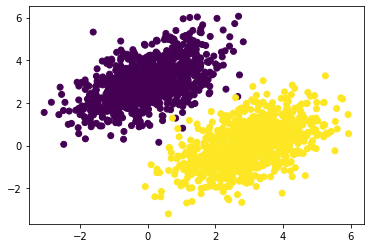

In [9]:
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

## Define weights and biases, and foward pass function

Now, let’s create a linear classifier that can learn to separate these two blobs. A linear classifier is an affine transformation `prediction = inputs • W + b` trained to minimize the square of the difference between predictions and the targets.

Let's start by creating a random weights and bias tensor.

Since we are dealing with coordinate points in a 2D plane, our input dimension is 2. 

We want to classify the points into one of two cases, "zero" or "one". Since there is one classification, the output dimension is 1. 

In [33]:
input_dim = 2   
output_dim = 1  

# Generate random weights and bias tensors.
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

print(f"The weights matrix is: \n{W.numpy()}\n")
print(f"The bias matrix is: \n {b.numpy()}")

The weights matrix is: 
[[0.19269931]
 [0.5173285 ]]

The bias matrix is: 
 [0.]


Our "forward pass" function simply computes `prediction = inputs • W + b`

W has dimensions (2, 1)

inputs will have the dimensions (2000, 2)

In order to multiply these two matricies, we need to do inputs * W

For each input, (x, y), in inputs, we are computing `(w1, w2) * (x, y) + b = w1+x + w2*y + b`

Thus, we will return a vector of shape (2000, 1), representing the prediction of each point.

In [38]:
print(np.shape(W))
print(np.shape(inputs))

(2, 1)
(2000, 2)


In [35]:
def model(inputs):
    return tf.matmul(inputs, W) + b

## Define square loss function

In this example, we will mesure the loss as the square of the distances between the target and prediction.

`tf.square()` Computes square of x element-wise.

`targets` is a (2000, 1) vector containing either 0 or 1. 

`predictions` is a (2000, 1) vector containing the result of `tf.matmul(inputs, W) + b`

In [42]:
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)   

    # Since we do not specify an axis, we return a single value representing the mean of every element. 
    # https://www.tensorflow.org/api_docs/python/tf/math/reduce_mean
    return tf.reduce_mean(per_sample_losses)               

## Define the training step

The goal of the training step is to update the weights and biases to reduce the loss

In [ ]:
learning_rate = 0.1

def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(predictions, targets)                     

    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])   
    W.assign_sub(grad_loss_wrt_W * learning_rate)                    
    b.assign_sub(grad_loss_wrt_b * learning_rate)                    

    return loss